In [175]:
#import the necessary packages

import numpy as np 
import pandas as pd 
from sklearn import datasets, metrics, svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [176]:
#load the data
digits = datasets.load_digits()


In [177]:
# Create feature and target arrays
X = digits.data
y = digits.target


In [178]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [179]:
# Create a k-NN classifier with 5 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [180]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

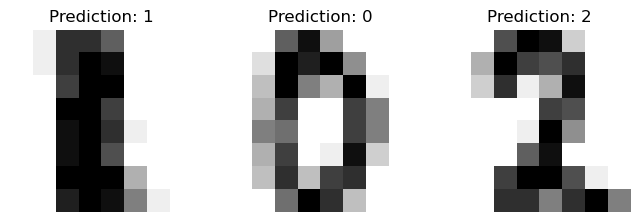

In [183]:
#These are the images of the first 3 in the predicted

predicted = knn.predict(X_test)
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [184]:
#this is just a confusion matrix on how well the model did
from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(y_test, predicted)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  1  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0 36]]


In [185]:
#I was not able to figure how to pull individual samples and look at the nearest neighbors. Here are individual points with their nearest neighbors

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
predicted2 = np.array(predicted).reshape(-1,1)
neigh.fit(predicted2)
print(neigh.kneighbors([[0.]]))
print(neigh.kneighbors([[3.]]))
print(neigh.kneighbors([[4.]]))
print(neigh.kneighbors([[5.]]))
print(neigh.kneighbors([[6.]]))

(array([[0., 0., 0., 0., 0.]]), array([[  1, 186, 129, 116, 235]], dtype=int64))
(array([[0., 0., 0., 0., 0.]]), array([[ 45, 178, 121,  32, 196]], dtype=int64))
(array([[0., 0., 0., 0., 0.]]), array([[27, 55, 47, 12, 29]], dtype=int64))
(array([[0., 0., 0., 0., 0.]]), array([[ 22,  91,  61,  60, 270]], dtype=int64))
(array([[0., 0., 0., 0., 0.]]), array([[ 3, 48, 34,  7, 19]], dtype=int64))


In [186]:
#Here is the Guassian NB

from sklearn.naive_bayes import GaussianNB
skf = StratifiedKFold(n_splits=5)
params = {}
nb = GaussianNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)
gs.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

In [187]:
#Here is the F1 score for the Guassian NB
from sklearn.metrics import (f1_score)
f1_score(y_test, predicted, average=None)

array([1.        , 0.98591549, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.98765432, 1.        ])